# How are in-demand skills trending for Data Analysts?

**Methology:**

  1.Aggregate skill counts monthly.

  2.Re-analyze based on percentage of total jobs.

  3.Plot the monthly skill demand.

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US=df[(df['job_title']=='Data Analyst') & (df['job_country']=='United States')].copy()

In [3]:
df_DA_US['job_posted_month_no']=df_DA_US['job_posted_date'].dt.month

In [4]:
df_DA_US_explode=df_DA_US.explode('job_skills')

In [7]:
df_pivot=df_DA_US_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)

In [9]:
df_pivot.loc['total']=df_pivot.sum()
df_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,12,0,53,0,1,0,0,1,1,8,...,2,0,0,2,10,0,169,0,0,3
2,13,0,34,1,2,0,0,4,2,7,...,0,5,1,1,21,1,128,0,0,2
3,11,0,41,1,3,0,0,6,2,4,...,1,2,0,2,14,3,142,0,0,4
4,5,0,57,1,0,0,0,1,0,1,...,2,0,0,1,24,4,143,1,0,2
5,6,1,35,0,3,0,0,1,2,1,...,0,0,0,1,20,0,92,0,0,1
6,10,3,33,1,1,0,2,0,0,4,...,1,0,0,0,15,2,126,0,0,2
7,13,0,33,0,1,0,0,1,0,4,...,0,0,0,0,15,2,101,0,1,0
8,9,2,29,0,0,0,0,0,0,14,...,0,0,0,1,15,1,112,0,0,5
9,7,0,19,1,0,1,0,2,0,0,...,2,0,0,0,11,0,65,0,0,2


In [12]:
df_pivot.loc['total'].sort_values(ascending=False).index

Index(['sql', 'excel', 'tableau', 'python', 'power bi', 'sas', 'r', 'word',
       'powerpoint', 'oracle',
       ...
       'mariadb', 'mxnet', 'next.js', 'ringcentral', 'sqlserver', 'svelte',
       'theano', 'tidyr', 'symphony', 'yarn'],
      dtype='object', name='job_skills', length=188)

In [14]:
df_pivot=df_pivot[df_pivot.loc['total'].sort_values(ascending=False).index]

In [15]:
df_pivot=df_pivot.drop('total')

In [19]:
df_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,mariadb,mxnet,next.js,ringcentral,sqlserver,svelte,theano,tidyr,symphony,yarn
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,0,0,0,1,0,0,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,0,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,1,0,0,0,0,0,0,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,0,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,0,1,0,1,0,0,0,0,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,0,0,0,0,0,1,0


In [25]:
Da_total=df_DA_US.groupby('job_posted_month_no').size()



In [32]:
df_DA_US_percent=df_pivot.div(Da_total/100,axis=0)

In [ ]:
# month no to month name
df_DA_US_percent=df_DA_US_percent.reset_index()
# df_DA_US_percent

job_skills,job_posted_month_no,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,...,mariadb,mxnet,next.js,ringcentral,sqlserver,svelte,theano,tidyr,symphony,yarn
0,1,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,...,0.000000,0.000000,0.000000,0.055066,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
1,2,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
2,3,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
3,4,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
4,5,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,...,0.086505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
5,6,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
6,7,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,...,0.000000,0.000000,0.104712,0.000000,0.104712,0.000000,0.000000,0.0000,0.000000,0.104712
7,8,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
8,9,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.116822,0.000000
9,10,55.489022,34.231537,30.738523,26.946108,20.658683,14.970060,15.369261,7.584830,7.085828,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0998,0.000000,0.000000


In [34]:
df_DA_US_percent['job_posted_month']=df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format="%m").strftime('%b'))

In [35]:
df_DA_US_percent=df_DA_US_percent.set_index('job_posted_month')

In [37]:
df_DA_US_percent=df_DA_US_percent.drop(columns='job_posted_month_no')

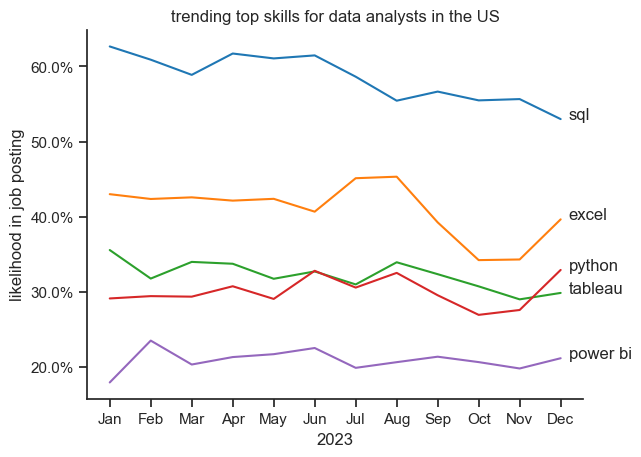

In [ ]:
pivot_plot=df_DA_US_percent.iloc[:,:5]

sns.lineplot(data=pivot_plot,dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()
plt.title('trending top skills for data analysts in the US')
plt.ylabel('likelihood in job posting')
plt.xlabel('2023')
plt.legend().remove()
 # for making y axis in percentage formatting
from matplotlib.ticker import PercentFormatter
ax= plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter())
for i in range(5):
  plt.text(11.2,pivot_plot.iloc[-1,i],pivot_plot.columns[i])

In [55]:
pivot_plot.columns

Index(['sql', 'excel', 'tableau', 'python', 'power bi'], dtype='object', name='job_skills')